In [1]:
import pandas as pd
language_accuracy=pd.read_csv('../finetuning_BERT_NER/all_langs_overlap_train_test', sep=',', encoding='utf-8')
ner_perturb_unknownentity=pd.read_csv('../finetuning_BERT_NER/ner_perturb_unknownentity', sep=',', encoding='utf-8')
perturb_1_compare=language_accuracy.merge(ner_perturb_unknownentity[['l1','l2','l1-name','l2-name','model_type','f1_score']],on=['l1','l2','l1-name','l2-name','model_type'],suffixes=('_before', '_after'))
perturb_2_compare=pd.read_csv('../finetuning_BERT_NER/perturb_2_compare',sep=',', encoding='utf-8')
ner_perturb_combine=pd.read_csv('../finetuning_BERT_NER/ner_perturb_combine', sep=',', encoding='utf-8')
perturb_3_compare=language_accuracy.merge(ner_perturb_combine[['l1','l2','l1-name','l2-name','model_type','f1_score']],on=['l1','l2','l1-name','l2-name','model_type'],suffixes=('_before', '_after'))
perturb_4_compare=pd.read_csv('../finetuning_BERT_WikiTitle/perturb_5_compare_cosine',sep=',', encoding='utf-8')
perturb_5_compare=pd.read_csv('../finetuning_BERT_WikiTitle/perturb_5_compare_random',sep=',', encoding='utf-8')

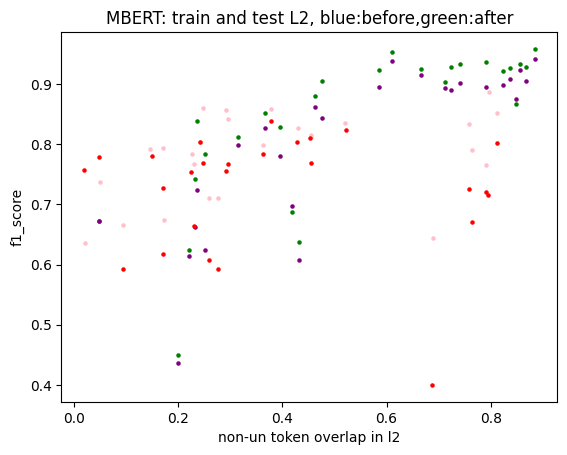

In [34]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
from sklearn.metrics import r2_score
import  scipy

mbert_trainl2_testl2=perturb_1_compare.drop(perturb_1_compare[(perturb_1_compare.model_type!='bert')].index)
plt.scatter(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_before'],c='green', s=5)

mbert_trainl2_testl2=perturb_1_compare.drop(perturb_1_compare[(perturb_1_compare.model_type!='xlmroberta')].index)
plt.scatter(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_before'],c='purple', s=5)

mbert_trainl2_testl2=perturb_4_compare.drop(perturb_4_compare[(perturb_4_compare.model_type!='bert')].index)
plt.scatter(mbert_trainl2_testl2['percentage_O_l2'],mbert_trainl2_testl2['f1_score_before'],c='pink', s=5)

mbert_trainl2_testl2=perturb_4_compare.drop(perturb_4_compare[(perturb_4_compare.model_type!='xlmroberta')].index)
plt.scatter(mbert_trainl2_testl2['percentage_O_l2'],mbert_trainl2_testl2['f1_score_before'],c='red', s=5)

plt.title("MBERT: train and test L2, blue:before,green:after")
# plt.xlim(0, 1)
# plt.ylim(.2,1)
plt.xlabel('non-un token overlap in l2')
plt.ylabel('f1_score')

plt.savefig("MBERT: train and test L2,cased, blue:before,green:after")

/s/babbage/b/nobackup/nblancha/merry/conda/envs/mbert_ner/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


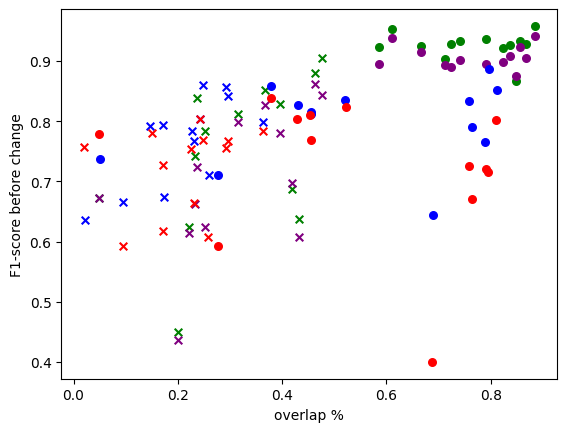

In [2]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
from sklearn.metrics import r2_score
import  scipy


mbert_trainl2_testl2=perturb_1_compare.drop(perturb_1_compare[(perturb_1_compare.model_type!='bert') | (perturb_1_compare.l1!=perturb_1_compare.l2)].index)
plt.scatter(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_before'],c='green', s=30)

mbert_trainl2_testl2=perturb_1_compare.drop(perturb_1_compare[(perturb_1_compare.model_type!='bert') | (perturb_1_compare.l1==perturb_1_compare.l2)].index)
plt.scatter(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_before'],c='green', s=30,marker='x')


mbert_trainl2_testl2=perturb_1_compare.drop(perturb_1_compare[(perturb_1_compare.model_type!='xlmroberta') | (perturb_1_compare.l1!=perturb_1_compare.l2)].index)
plt.scatter(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_before'],c='purple', s=30)

mbert_trainl2_testl2=perturb_1_compare.drop(perturb_1_compare[(perturb_1_compare.model_type!='xlmroberta') | (perturb_1_compare.l1==perturb_1_compare.l2)].index)
plt.scatter(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_before'],c='purple', s=30,marker='x')




mbert_trainl2_testl2=perturb_4_compare.drop(perturb_4_compare[(perturb_4_compare.model_type!='bert')| (perturb_4_compare.l1!=perturb_4_compare.l2)].index)
plt.scatter(mbert_trainl2_testl2['percentage_O_l2'],mbert_trainl2_testl2['f1_score_before'],c='blue', s=30)

mbert_trainl2_testl2=perturb_4_compare.drop(perturb_4_compare[(perturb_4_compare.model_type!='bert')| (perturb_4_compare.l1==perturb_4_compare.l2)].index)
plt.scatter(mbert_trainl2_testl2['percentage_O_l2'],mbert_trainl2_testl2['f1_score_before'],c='blue', s=30,marker='x')


mbert_trainl2_testl2=perturb_4_compare.drop(perturb_4_compare[(perturb_4_compare.model_type!='xlmroberta')| (perturb_4_compare.l1!=perturb_4_compare.l2)].index)
plt.scatter(mbert_trainl2_testl2['percentage_O_l2'],mbert_trainl2_testl2['f1_score_before'],c='red', s=30)

mbert_trainl2_testl2=perturb_4_compare.drop(perturb_4_compare[(perturb_4_compare.model_type!='xlmroberta')| (perturb_4_compare.l1==perturb_4_compare.l2)].index)
plt.scatter(mbert_trainl2_testl2['percentage_O_l2'],mbert_trainl2_testl2['f1_score_before'],c='red', s=30,marker='x')


# plt.xlim(0, 1)
# plt.ylim(.4,1)

plt.xlabel('overlap %')
plt.ylabel('F1-score before change')
plt.savefig("F1-score_before")

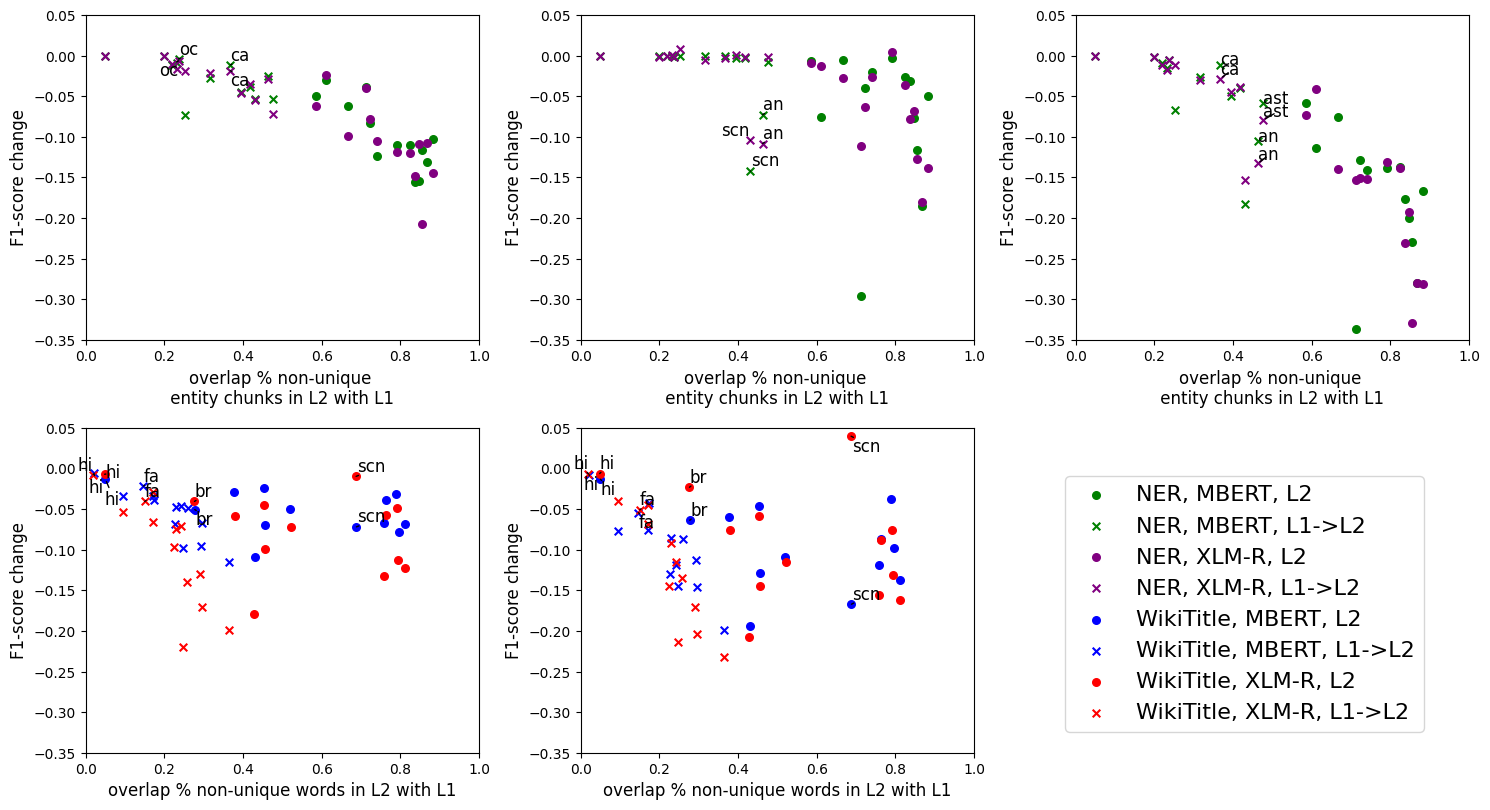

In [8]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
from sklearn.metrics import r2_score
import  scipy
import numpy as np
import matplotlib.transforms as mtrans

fig,axes=plt.subplots(2, 3, figsize=(15, 10))



mbert_trainl2_testl2=perturb_1_compare.drop(perturb_1_compare[(perturb_1_compare.model_type!='bert') | (perturb_1_compare.l1!=perturb_1_compare.l2)].index)
axes[0,0].scatter(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_after']-mbert_trainl2_testl2['f1_score_before'],c='green', s=30,label='NER, MBERT, L2')

mbert_trainl2_testl2=perturb_1_compare.drop(perturb_1_compare[(perturb_1_compare.model_type!='bert') | (perturb_1_compare.l1==perturb_1_compare.l2)].index)
axes[0,0].scatter(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_after']-mbert_trainl2_testl2['f1_score_before'],c='green', s=30,marker='x',label='NER, MBERT, L1->L2')

texts=[]
for i in range(len(mbert_trainl2_testl2)):
    if((mbert_trainl2_testl2.iloc[i]['l1']=='fr' and mbert_trainl2_testl2.iloc[i]['l2']=='oc') or
    (mbert_trainl2_testl2.iloc[i]['l1']=='es' and mbert_trainl2_testl2.iloc[i]['l2']=='ca')):
        texts.append(axes[0,0].text(mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2'],mbert_trainl2_testl2.iloc[i]['f1_score_after']-mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['l2'], fontsize=12))


mbert_trainl2_testl2=perturb_1_compare.drop(perturb_1_compare[(perturb_1_compare.model_type!='xlmroberta') | (perturb_1_compare.l1!=perturb_1_compare.l2)].index)
axes[0,0].scatter(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_after']-mbert_trainl2_testl2['f1_score_before'],c='purple', s=30,label='NER, XLM-R, L2')

mbert_trainl2_testl2=perturb_1_compare.drop(perturb_1_compare[(perturb_1_compare.model_type!='xlmroberta') | (perturb_1_compare.l1==perturb_1_compare.l2)].index)
axes[0,0].scatter(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_after']-mbert_trainl2_testl2['f1_score_before'],c='purple', s=30,marker='x',label='NER, XLM-R, L1->L2')


for i in range(len(mbert_trainl2_testl2)):
    if((mbert_trainl2_testl2.iloc[i]['l1']=='fr' and mbert_trainl2_testl2.iloc[i]['l2']=='oc') or
    (mbert_trainl2_testl2.iloc[i]['l1']=='es' and mbert_trainl2_testl2.iloc[i]['l2']=='ca')):
        texts.append(axes[0,0].text(mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2'],mbert_trainl2_testl2.iloc[i]['f1_score_after']-mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['l2'], fontsize=12))
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k'),ax=axes[0,0])

axes[0,0].set_xlabel("overlap % non-unique \n entity chunks in L2 with L1 \n", fontsize=12)
axes[0,0].set_ylabel('F1-score change', fontsize=12)


mbert_trainl2_testl2=perturb_2_compare.drop(perturb_2_compare[(perturb_2_compare.model_type!='bert')| (perturb_2_compare.l1!=perturb_2_compare.l2)].index)
axes[0,1].scatter(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_after']-mbert_trainl2_testl2['f1_score_before'],c='green', s=30)

mbert_trainl2_testl2=perturb_2_compare.drop(perturb_2_compare[(perturb_2_compare.model_type!='bert')| (perturb_2_compare.l1==perturb_2_compare.l2)].index)
axes[0,1].scatter(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_after']-mbert_trainl2_testl2['f1_score_before'],c='green', s=30,marker='x')

texts=[]
for i in range(len(mbert_trainl2_testl2)):
    if((mbert_trainl2_testl2.iloc[i]['l1']=='it' and mbert_trainl2_testl2.iloc[i]['l2']=='scn') or
    (mbert_trainl2_testl2.iloc[i]['l1']=='es' and mbert_trainl2_testl2.iloc[i]['l2']=='an')):
        texts.append(axes[0,1].text(mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2'],mbert_trainl2_testl2.iloc[i]['f1_score_after']-mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['l2'], fontsize=12))



mbert_trainl2_testl2=perturb_2_compare.drop(perturb_2_compare[(perturb_2_compare.model_type!='xlmroberta') | (perturb_2_compare.l1!=perturb_2_compare.l2)].index)
axes[0,1].scatter(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_after']-mbert_trainl2_testl2['f1_score_before'],c='purple', s=30)

mbert_trainl2_testl2=perturb_2_compare.drop(perturb_2_compare[(perturb_2_compare.model_type!='xlmroberta') | (perturb_2_compare.l1==perturb_2_compare.l2)].index)
axes[0,1].scatter(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_after']-mbert_trainl2_testl2['f1_score_before'],c='purple', s=30,marker='x')


axes[0,1].set_xlabel("overlap % non-unique \n entity chunks in L2 with L1 \n", fontsize=12)
axes[0,1].set_ylabel('F1-score change', fontsize=12)

for i in range(len(mbert_trainl2_testl2)):
    if((mbert_trainl2_testl2.iloc[i]['l1']=='it' and mbert_trainl2_testl2.iloc[i]['l2']=='scn') or
    (mbert_trainl2_testl2.iloc[i]['l1']=='es' and mbert_trainl2_testl2.iloc[i]['l2']=='an')):
        texts.append(axes[0,1].text(mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2'],mbert_trainl2_testl2.iloc[i]['f1_score_after']-mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['l2'], fontsize=12))
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k'),ax=axes[0,1])



mbert_trainl2_testl2=perturb_3_compare.drop(perturb_3_compare[(perturb_3_compare.model_type!='bert')| (perturb_3_compare.l1!=perturb_3_compare.l2)].index)
axes[0,2].scatter(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_after']-mbert_trainl2_testl2['f1_score_before'],c='green', s=30)

mbert_trainl2_testl2=perturb_3_compare.drop(perturb_3_compare[(perturb_3_compare.model_type!='bert')| (perturb_3_compare.l1==perturb_3_compare.l2)].index)
axes[0,2].scatter(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_after']-mbert_trainl2_testl2['f1_score_before'],c='green', s=30,marker='x')

texts=[]
for i in range(len(mbert_trainl2_testl2)):
    if((mbert_trainl2_testl2.iloc[i]['l1']=='es' and mbert_trainl2_testl2.iloc[i]['l2']=='an') or
       (mbert_trainl2_testl2.iloc[i]['l1']=='es' and mbert_trainl2_testl2.iloc[i]['l2']=='ast') or
    (mbert_trainl2_testl2.iloc[i]['l1']=='es' and mbert_trainl2_testl2.iloc[i]['l2']=='ca')):
        texts.append(axes[0,2].text(mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2'],mbert_trainl2_testl2.iloc[i]['f1_score_after']-mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['l2'], fontsize=12))


mbert_trainl2_testl2=perturb_3_compare.drop(perturb_3_compare[(perturb_3_compare.model_type!='xlmroberta') | (perturb_3_compare.l1!=perturb_3_compare.l2)].index)
axes[0,2].scatter(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_after']-mbert_trainl2_testl2['f1_score_before'],c='purple', s=30)

mbert_trainl2_testl2=perturb_3_compare.drop(perturb_3_compare[(perturb_3_compare.model_type!='xlmroberta') | (perturb_3_compare.l1==perturb_3_compare.l2)].index)
axes[0,2].scatter(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_after']-mbert_trainl2_testl2['f1_score_before'],c='purple', s=30,marker='x')


texts=[]
for i in range(len(mbert_trainl2_testl2)):
    if((mbert_trainl2_testl2.iloc[i]['l1']=='es' and mbert_trainl2_testl2.iloc[i]['l2']=='an') or
       (mbert_trainl2_testl2.iloc[i]['l1']=='es' and mbert_trainl2_testl2.iloc[i]['l2']=='ast') or
    (mbert_trainl2_testl2.iloc[i]['l1']=='es' and mbert_trainl2_testl2.iloc[i]['l2']=='ca')):
        texts.append(axes[0,2].text(mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2'],mbert_trainl2_testl2.iloc[i]['f1_score_after']-mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['l2'], fontsize=12))
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k'),ax=axes[0,2],avoid_self=False)

axes[0,2].set_xlabel("overlap % non-unique \n entity chunks in L2 with L1 \n", fontsize=12)
axes[0,2].set_ylabel('F1-score change', fontsize=12)


mbert_trainl2_testl2=perturb_4_compare.drop(perturb_4_compare[(perturb_4_compare.model_type!='bert')| (perturb_4_compare.l1!=perturb_4_compare.l2)].index)
axes[1,0].scatter(mbert_trainl2_testl2['percentage_O_l2'],mbert_trainl2_testl2['f1_score_after']-mbert_trainl2_testl2['f1_score_before'],c='blue', s=30,label='WikiTitle, MBERT, L2')

texts=[]
for i in range(len(mbert_trainl2_testl2)):
    if((mbert_trainl2_testl2.iloc[i]['l1']=='br' and mbert_trainl2_testl2.iloc[i]['l2']=='br') or
       (mbert_trainl2_testl2.iloc[i]['l1']=='hi' and mbert_trainl2_testl2.iloc[i]['l2']=='hi') or
       (mbert_trainl2_testl2.iloc[i]['l1']=='scn' and mbert_trainl2_testl2.iloc[i]['l2']=='scn')):
        texts.append(axes[1,0].text(mbert_trainl2_testl2.iloc[i]['percentage_O_l2'],mbert_trainl2_testl2.iloc[i]['f1_score_after']-mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['l2'], fontsize=12))


mbert_trainl2_testl2=perturb_4_compare.drop(perturb_4_compare[(perturb_4_compare.model_type!='bert')| (perturb_4_compare.l1==perturb_4_compare.l2)].index)
axes[1,0].scatter(mbert_trainl2_testl2['percentage_O_l2'],mbert_trainl2_testl2['f1_score_after']-mbert_trainl2_testl2['f1_score_before'],c='blue', s=30,marker='x',label='WikiTitle, MBERT, L1->L2')

for i in range(len(mbert_trainl2_testl2)):
    if((mbert_trainl2_testl2.iloc[i]['l1']=='ar' and mbert_trainl2_testl2.iloc[i]['l2']=='hi') or
       (mbert_trainl2_testl2.iloc[i]['l1']=='ar' and mbert_trainl2_testl2.iloc[i]['l2']=='fa')):
        texts.append(axes[1,0].text(mbert_trainl2_testl2.iloc[i]['percentage_O_l2'],mbert_trainl2_testl2.iloc[i]['f1_score_after']-mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['l2'], fontsize=12))


mbert_trainl2_testl2=perturb_4_compare.drop(perturb_4_compare[(perturb_4_compare.model_type!='xlmroberta')| (perturb_4_compare.l1!=perturb_4_compare.l2)].index)
axes[1,0].scatter(mbert_trainl2_testl2['percentage_O_l2'],mbert_trainl2_testl2['f1_score_after']-mbert_trainl2_testl2['f1_score_before'],c='red', s=30,label='WikiTitle, XLM-R, L2')

for i in range(len(mbert_trainl2_testl2)):
    if((mbert_trainl2_testl2.iloc[i]['l1']=='br' and mbert_trainl2_testl2.iloc[i]['l2']=='br') or
       (mbert_trainl2_testl2.iloc[i]['l1']=='hi' and mbert_trainl2_testl2.iloc[i]['l2']=='hi') or
       (mbert_trainl2_testl2.iloc[i]['l1']=='scn' and mbert_trainl2_testl2.iloc[i]['l2']=='scn')):
        texts.append(axes[1,0].text(mbert_trainl2_testl2.iloc[i]['percentage_O_l2'],mbert_trainl2_testl2.iloc[i]['f1_score_after']-mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['l2'], fontsize=12))


mbert_trainl2_testl2=perturb_4_compare.drop(perturb_4_compare[(perturb_4_compare.model_type!='xlmroberta')| (perturb_4_compare.l1==perturb_4_compare.l2)].index)
axes[1,0].scatter(mbert_trainl2_testl2['percentage_O_l2'],mbert_trainl2_testl2['f1_score_after']-mbert_trainl2_testl2['f1_score_before'],c='red', s=30,marker='x',label='WikiTitle, XLM-R, L1->L2')

for i in range(len(mbert_trainl2_testl2)):
    if((mbert_trainl2_testl2.iloc[i]['l1']=='ar' and mbert_trainl2_testl2.iloc[i]['l2']=='hi') or
       (mbert_trainl2_testl2.iloc[i]['l1']=='ar' and mbert_trainl2_testl2.iloc[i]['l2']=='fa')):
        texts.append(axes[1,0].text(mbert_trainl2_testl2.iloc[i]['percentage_O_l2'],mbert_trainl2_testl2.iloc[i]['f1_score_after']-mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['l2'], fontsize=12))
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k'),ax=axes[1,0])


axes[1,0].set_xlabel("overlap % non-unique words in L2 with L1", fontsize=12)
axes[1,0].set_ylabel('F1-score change', fontsize=12)


mbert_trainl2_testl2=perturb_5_compare.drop(perturb_5_compare[(perturb_5_compare.model_type!='bert')| (perturb_5_compare.l1!=perturb_5_compare.l2)].index)
axes[1,1].scatter(mbert_trainl2_testl2['percentage_O_l2'],mbert_trainl2_testl2['f1_score_after']-mbert_trainl2_testl2['f1_score_before'],c='blue', s=30)

texts=[]
for i in range(len(mbert_trainl2_testl2)):
    if((mbert_trainl2_testl2.iloc[i]['l1']=='br' and mbert_trainl2_testl2.iloc[i]['l2']=='br') or
       (mbert_trainl2_testl2.iloc[i]['l1']=='hi' and mbert_trainl2_testl2.iloc[i]['l2']=='hi') or
       (mbert_trainl2_testl2.iloc[i]['l1']=='scn' and mbert_trainl2_testl2.iloc[i]['l2']=='scn')):
        texts.append(axes[1,1].text(mbert_trainl2_testl2.iloc[i]['percentage_O_l2'],mbert_trainl2_testl2.iloc[i]['f1_score_after']-mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['l2'], fontsize=12))
        

mbert_trainl2_testl2=perturb_5_compare.drop(perturb_5_compare[(perturb_5_compare.model_type!='bert')| (perturb_5_compare.l1==perturb_5_compare.l2)].index)
axes[1,1].scatter(mbert_trainl2_testl2['percentage_O_l2'],mbert_trainl2_testl2['f1_score_after']-mbert_trainl2_testl2['f1_score_before'],c='blue', s=30,marker='x')


for i in range(len(mbert_trainl2_testl2)):
    if((mbert_trainl2_testl2.iloc[i]['l1']=='ar' and mbert_trainl2_testl2.iloc[i]['l2']=='hi') or
       (mbert_trainl2_testl2.iloc[i]['l1']=='ar' and mbert_trainl2_testl2.iloc[i]['l2']=='fa')):
        texts.append(axes[1,1].text(mbert_trainl2_testl2.iloc[i]['percentage_O_l2'],mbert_trainl2_testl2.iloc[i]['f1_score_after']-mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['l2'], fontsize=12))

        
        
mbert_trainl2_testl2=perturb_5_compare.drop(perturb_5_compare[(perturb_5_compare.model_type!='xlmroberta')| (perturb_5_compare.l1!=perturb_5_compare.l2)].index)
axes[1,1].scatter(mbert_trainl2_testl2['percentage_O_l2'],mbert_trainl2_testl2['f1_score_after']-mbert_trainl2_testl2['f1_score_before'],c='red', s=30)

for i in range(len(mbert_trainl2_testl2)):
    if((mbert_trainl2_testl2.iloc[i]['l1']=='br' and mbert_trainl2_testl2.iloc[i]['l2']=='br') or
       (mbert_trainl2_testl2.iloc[i]['l1']=='hi' and mbert_trainl2_testl2.iloc[i]['l2']=='hi') or
       (mbert_trainl2_testl2.iloc[i]['l1']=='scn' and mbert_trainl2_testl2.iloc[i]['l2']=='scn')):
        texts.append(axes[1,1].text(mbert_trainl2_testl2.iloc[i]['percentage_O_l2'],mbert_trainl2_testl2.iloc[i]['f1_score_after']-mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['l2'], fontsize=12))


mbert_trainl2_testl2=perturb_5_compare.drop(perturb_5_compare[(perturb_5_compare.model_type!='xlmroberta')| (perturb_5_compare.l1==perturb_5_compare.l2)].index)
axes[1,1].scatter(mbert_trainl2_testl2['percentage_O_l2'],mbert_trainl2_testl2['f1_score_after']-mbert_trainl2_testl2['f1_score_before'],c='red', s=30,marker='x')

for i in range(len(mbert_trainl2_testl2)):
    if((mbert_trainl2_testl2.iloc[i]['l1']=='ar' and mbert_trainl2_testl2.iloc[i]['l2']=='hi') or
       (mbert_trainl2_testl2.iloc[i]['l1']=='ar' and mbert_trainl2_testl2.iloc[i]['l2']=='fa')):
        texts.append(axes[1,1].text(mbert_trainl2_testl2.iloc[i]['percentage_O_l2'],mbert_trainl2_testl2.iloc[i]['f1_score_after']-mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['l2'], fontsize=12))
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k'),ax=axes[1,1])


axes[1,1].set_xlabel("overlap % non-unique words in L2 with L1", fontsize=12)
axes[1,1].set_ylabel('F1-score change', fontsize=12)

fig.delaxes(axes[1,2]) 




# plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[],xlim=(0, 1),ylim=(0,.4))
plt.setp(plt.gcf().get_axes(),xlim=(0, 1),ylim=(-.35,0.05))
fig.tight_layout()
fig.subplots_adjust(top=0.8)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels,fontsize=16,bbox_to_anchor=(.96, .35))

# fig.suptitle("green points and stars show the F1-accuracy change for mBERT in NER perturbations, \n purple points and stars show the F1-accuracy change for XLMR in NER perturbations, \n blue points and stars show the F1-accuracy change for mBERT in WikiTitle perturbations, \n red points and stars show the F1-accuracy change for XLMR in WikiTitle perturbations, \n point for different source and target languages and stars for similar source and target languages \n\n ", fontsize=16)

plt.savefig("points-all-plots",bbox_inches='tight')


In [42]:
0.72473-0.718274 

0.006456000000000017

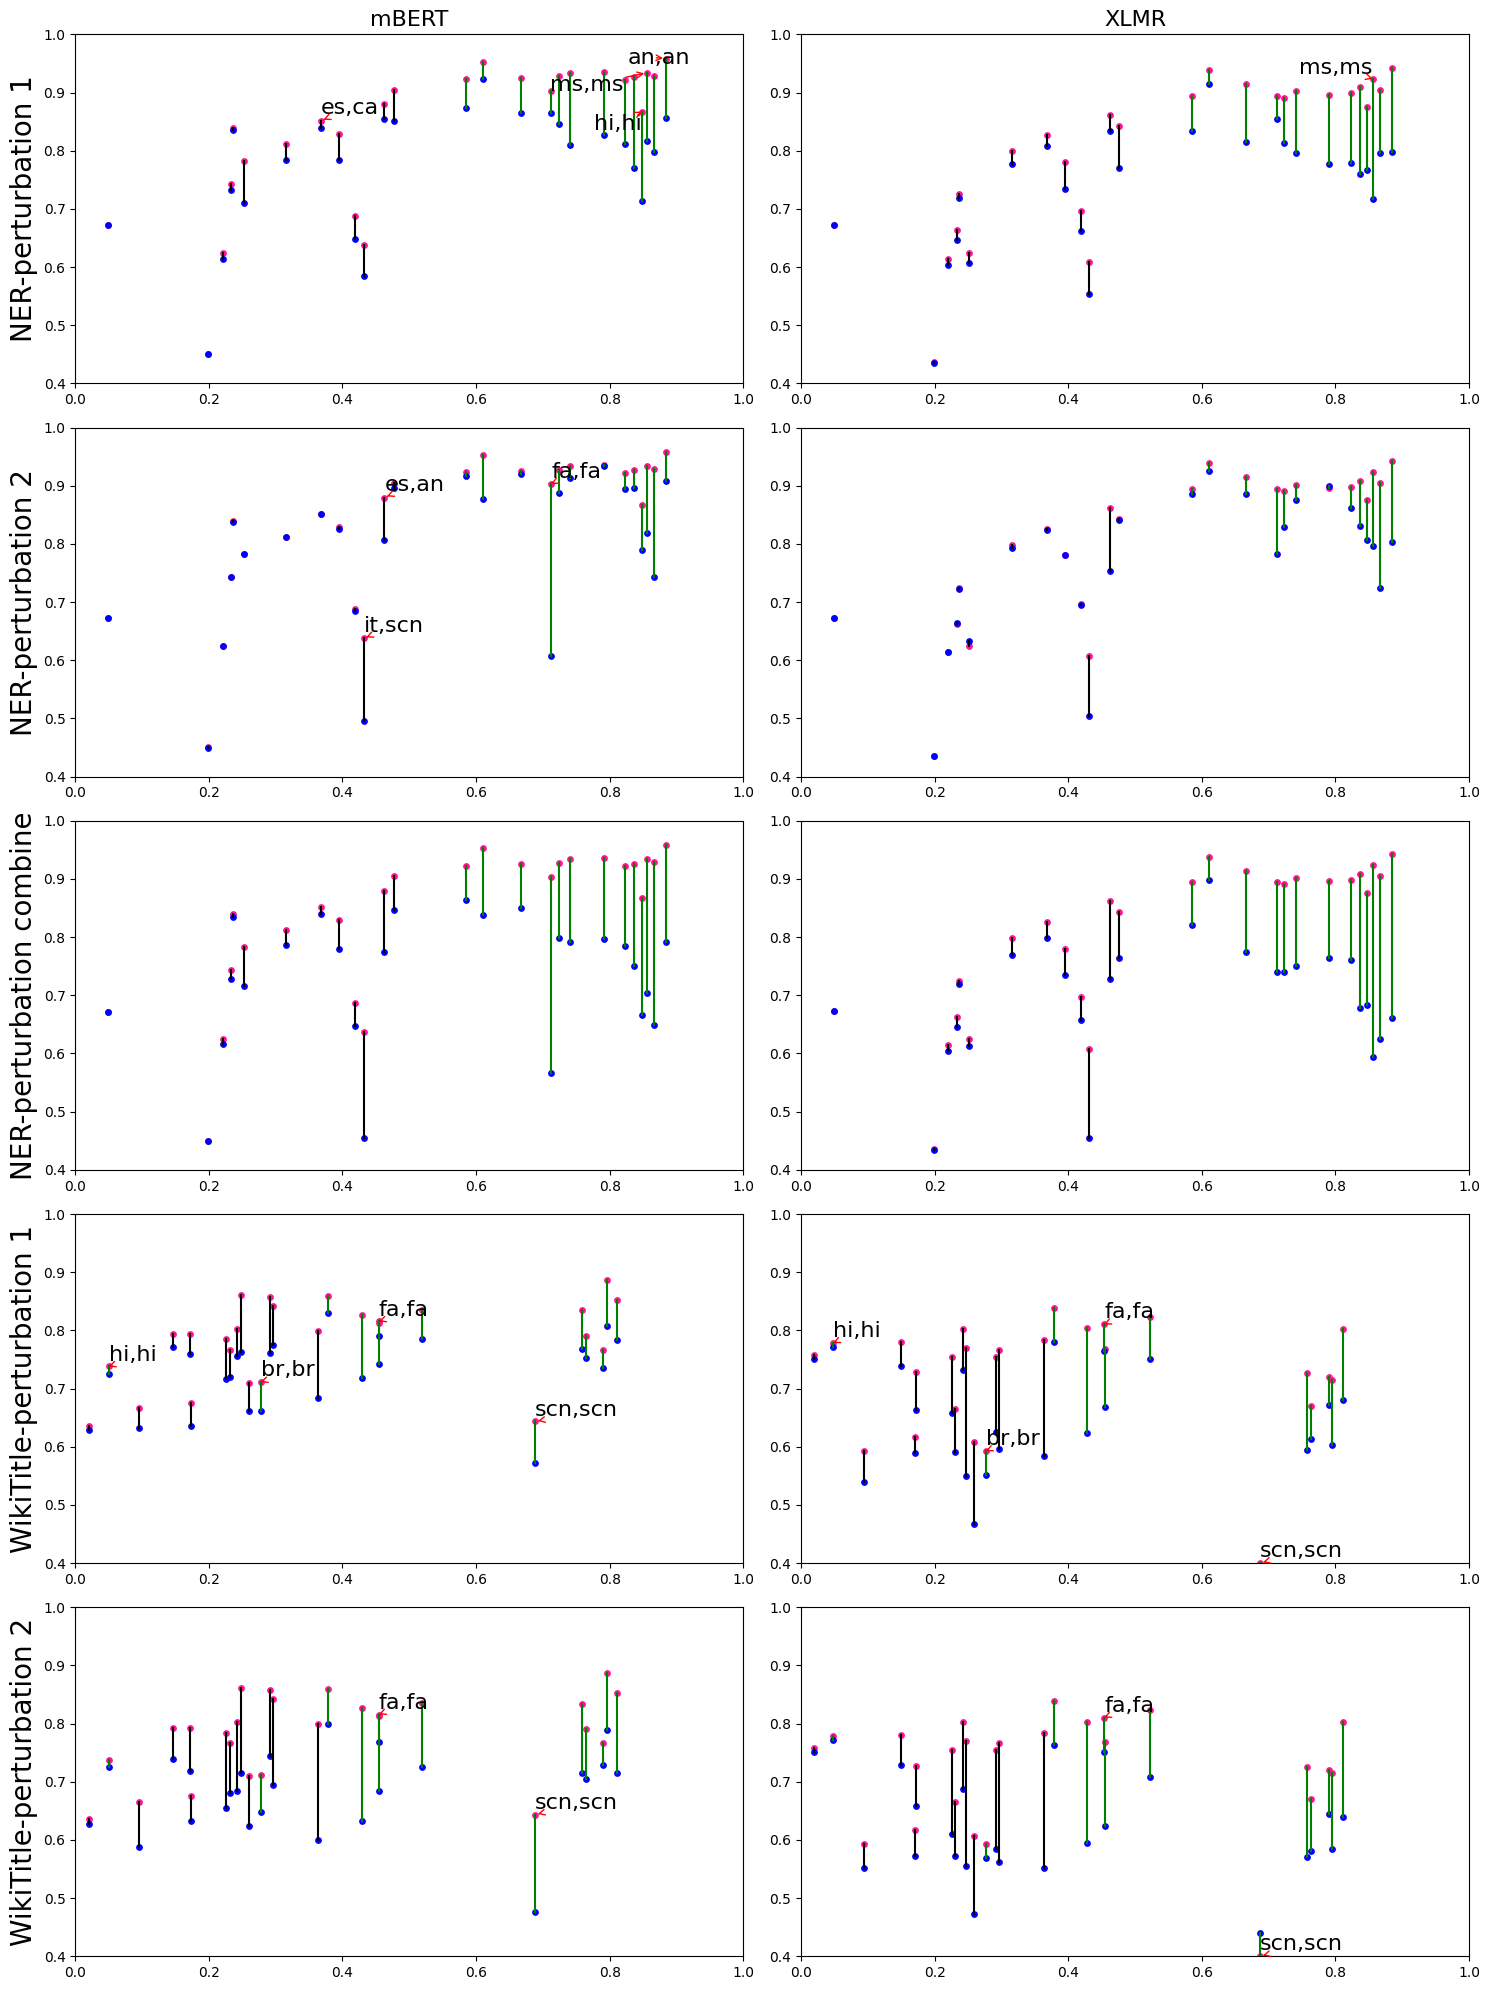

In [22]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
from sklearn.metrics import r2_score
import  scipy

fig,axes=plt.subplots(5, 2, figsize=(15, 20))

plt.subplot(5,2,1)

mbert_trainl2_testl2=perturb_1_compare.drop(perturb_1_compare[(perturb_1_compare.model_type!='bert')].index)
plt.scatter(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_before'],c='deeppink', s=15)

mbert_trainl2_testl2=perturb_1_compare.drop(perturb_1_compare[(perturb_1_compare.model_type!='bert')].index)
plt.scatter(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_after'],c='blue', s=15)

for i in range(len(mbert_trainl2_testl2)):
    if mbert_trainl2_testl2.iloc[i]['l1']==mbert_trainl2_testl2.iloc[i]['l2']:
        plt.plot([mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2'],mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2']],
            [mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['f1_score_after']], 'g-')
    else:
        plt.plot([mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2'],mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2']],
            [mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['f1_score_after']], 'k-')

texts=[]
for i in range(len(mbert_trainl2_testl2)):
    if((mbert_trainl2_testl2.iloc[i]['l1']=='hi' and mbert_trainl2_testl2.iloc[i]['l2']=='hi') or
    (mbert_trainl2_testl2.iloc[i]['l1']=='an' and mbert_trainl2_testl2.iloc[i]['l2']=='an') or
       (mbert_trainl2_testl2.iloc[i]['l1']=='es' and mbert_trainl2_testl2.iloc[i]['l2']=='ca') or
      (mbert_trainl2_testl2.iloc[i]['l1']=='ms' and mbert_trainl2_testl2.iloc[i]['l2']=='ms')):
        texts.append(plt.text(mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2'],mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['l1']+","+mbert_trainl2_testl2.iloc[i]['l2'], fontsize=16))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=1))
    
plt.subplot(5,2,2)

mbert_trainl2_testl2=perturb_1_compare.drop(perturb_1_compare[(perturb_1_compare.model_type!='xlmroberta')].index)
plt.scatter(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_before'],c='deeppink', s=15)

mbert_trainl2_testl2=perturb_1_compare.drop(perturb_1_compare[(perturb_1_compare.model_type!='xlmroberta')].index)
plt.scatter(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_after'],c='blue', s=15)

for i in range(len(mbert_trainl2_testl2)):
    if mbert_trainl2_testl2.iloc[i]['l1']==mbert_trainl2_testl2.iloc[i]['l2']:
        plt.plot([mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2'],mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2']],
            [mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['f1_score_after']], 'g-')
    else:
        plt.plot([mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2'],mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2']],
            [mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['f1_score_after']], 'k-')
    
texts=[]
for i in range(len(mbert_trainl2_testl2)):
    if((mbert_trainl2_testl2.iloc[i]['l1']=='ms' and mbert_trainl2_testl2.iloc[i]['l2']=='ms')):
        texts.append(plt.text(mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2'],mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['l1']+","+mbert_trainl2_testl2.iloc[i]['l2'], fontsize=16))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=1))
    
plt.subplot(5,2,3)

mbert_trainl2_testl2=perturb_2_compare.drop(perturb_2_compare[(perturb_2_compare.model_type!='bert')].index)
plt.scatter(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_before'],c='deeppink', s=15)

mbert_trainl2_testl2=perturb_2_compare.drop(perturb_2_compare[(perturb_2_compare.model_type!='bert')].index)
plt.scatter(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_after'],c='blue', s=15)

for i in range(len(mbert_trainl2_testl2)):
    if mbert_trainl2_testl2.iloc[i]['l1']==mbert_trainl2_testl2.iloc[i]['l2']:
        plt.plot([mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2'],mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2']],
            [mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['f1_score_after']], 'g-')
    else:
        plt.plot([mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2'],mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2']],
            [mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['f1_score_after']], 'k-')

texts=[]
for i in range(len(mbert_trainl2_testl2)):
    if((mbert_trainl2_testl2.iloc[i]['l1']=='fa' and mbert_trainl2_testl2.iloc[i]['l2']=='fa') or
      (mbert_trainl2_testl2.iloc[i]['l1']=='it' and mbert_trainl2_testl2.iloc[i]['l2']=='scn') or
      (mbert_trainl2_testl2.iloc[i]['l1']=='es' and mbert_trainl2_testl2.iloc[i]['l2']=='an')):
        texts.append(plt.text(mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2'],mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['l1']+","+mbert_trainl2_testl2.iloc[i]['l2'], fontsize=16))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=1))

        
plt.subplot(5,2,4)

mbert_trainl2_testl2=perturb_2_compare.drop(perturb_2_compare[(perturb_2_compare.model_type!='xlmroberta')].index)
plt.scatter(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_before'],c='deeppink', s=15)

mbert_trainl2_testl2=perturb_2_compare.drop(perturb_2_compare[(perturb_2_compare.model_type!='xlmroberta')].index)
plt.scatter(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_after'],c='blue', s=15)

for i in range(len(mbert_trainl2_testl2)):
    if mbert_trainl2_testl2.iloc[i]['l1']==mbert_trainl2_testl2.iloc[i]['l2']:
        plt.plot([mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2'],mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2']],
            [mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['f1_score_after']], 'g-')
    else:
        plt.plot([mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2'],mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2']],
            [mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['f1_score_after']], 'k-')
    
    
    
plt.subplot(5,2,5)

mbert_trainl2_testl2=perturb_3_compare.drop(perturb_3_compare[(perturb_3_compare.model_type!='bert')].index)
plt.scatter(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_before'],c='deeppink', s=15)

mbert_trainl2_testl2=perturb_3_compare.drop(perturb_3_compare[(perturb_3_compare.model_type!='bert')].index)
plt.scatter(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_after'],c='blue', s=15)

for i in range(len(mbert_trainl2_testl2)):
    if mbert_trainl2_testl2.iloc[i]['l1']==mbert_trainl2_testl2.iloc[i]['l2']:
        plt.plot([mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2'],mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2']],
            [mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['f1_score_after']], 'g-')
    else:
        plt.plot([mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2'],mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2']],
            [mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['f1_score_after']], 'k-')


plt.subplot(5,2,6)

mbert_trainl2_testl2=perturb_3_compare.drop(perturb_3_compare[(perturb_3_compare.model_type!='xlmroberta')].index)
plt.scatter(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_before'],c='deeppink', s=15)

mbert_trainl2_testl2=perturb_3_compare.drop(perturb_3_compare[(perturb_3_compare.model_type!='xlmroberta')].index)
plt.scatter(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_after'],c='blue', s=15)

for i in range(len(mbert_trainl2_testl2)):
    if mbert_trainl2_testl2.iloc[i]['l1']==mbert_trainl2_testl2.iloc[i]['l2']:
        plt.plot([mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2'],mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2']],
            [mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['f1_score_after']], 'g-')
    else:
        plt.plot([mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2'],mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2']],
            [mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['f1_score_after']], 'k-')

plt.subplot(5,2,7)

mbert_trainl2_testl2=perturb_4_compare.drop(perturb_4_compare[(perturb_4_compare.model_type!='bert')].index)
plt.scatter(mbert_trainl2_testl2['percentage_O_l2'],mbert_trainl2_testl2['f1_score_before'],c='deeppink', s=15)

mbert_trainl2_testl2=perturb_4_compare.drop(perturb_4_compare[(perturb_4_compare.model_type!='bert')].index)
plt.scatter(mbert_trainl2_testl2['percentage_O_l2'],mbert_trainl2_testl2['f1_score_after'],c='blue', s=15)

for i in range(len(mbert_trainl2_testl2)):
    if mbert_trainl2_testl2.iloc[i]['l1']==mbert_trainl2_testl2.iloc[i]['l2']:
        plt.plot([mbert_trainl2_testl2.iloc[i]['percentage_O_l2'],mbert_trainl2_testl2.iloc[i]['percentage_O_l2']],
            [mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['f1_score_after']], 'g-')
    else:
        plt.plot([mbert_trainl2_testl2.iloc[i]['percentage_O_l2'],mbert_trainl2_testl2.iloc[i]['percentage_O_l2']],
            [mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['f1_score_after']], 'k-')
texts=[]
for i in range(len(mbert_trainl2_testl2)):
    if((mbert_trainl2_testl2.iloc[i]['l1']=='br' and mbert_trainl2_testl2.iloc[i]['l2']=='br') or
      (mbert_trainl2_testl2.iloc[i]['l1']=='hi' and mbert_trainl2_testl2.iloc[i]['l2']=='hi') or
      (mbert_trainl2_testl2.iloc[i]['l1']=='scn' and mbert_trainl2_testl2.iloc[i]['l2']=='scn') or
      (mbert_trainl2_testl2.iloc[i]['l1']=='fa' and mbert_trainl2_testl2.iloc[i]['l2']=='fa')):
        texts.append(plt.text(mbert_trainl2_testl2.iloc[i]['percentage_O_l2'],mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['l1']+","+mbert_trainl2_testl2.iloc[i]['l2'], fontsize=16))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=1))

    
plt.subplot(5,2,8)

mbert_trainl2_testl2=perturb_4_compare.drop(perturb_4_compare[(perturb_4_compare.model_type!='xlmroberta')].index)
plt.scatter(mbert_trainl2_testl2['percentage_O_l2'],mbert_trainl2_testl2['f1_score_before'],c='deeppink', s=15)

mbert_trainl2_testl2=perturb_4_compare.drop(perturb_4_compare[(perturb_4_compare.model_type!='xlmroberta')].index)
plt.scatter(mbert_trainl2_testl2['percentage_O_l2'],mbert_trainl2_testl2['f1_score_after'],c='blue', s=15)

for i in range(len(mbert_trainl2_testl2)):
    if mbert_trainl2_testl2.iloc[i]['l1']==mbert_trainl2_testl2.iloc[i]['l2']:
        plt.plot([mbert_trainl2_testl2.iloc[i]['percentage_O_l2'],mbert_trainl2_testl2.iloc[i]['percentage_O_l2']],
            [mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['f1_score_after']], 'g-')
    else:
        plt.plot([mbert_trainl2_testl2.iloc[i]['percentage_O_l2'],mbert_trainl2_testl2.iloc[i]['percentage_O_l2']],
            [mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['f1_score_after']], 'k-')

texts=[]
for i in range(len(mbert_trainl2_testl2)):
    if((mbert_trainl2_testl2.iloc[i]['l1']=='br' and mbert_trainl2_testl2.iloc[i]['l2']=='br') or
      (mbert_trainl2_testl2.iloc[i]['l1']=='hi' and mbert_trainl2_testl2.iloc[i]['l2']=='hi') or
      (mbert_trainl2_testl2.iloc[i]['l1']=='scn' and mbert_trainl2_testl2.iloc[i]['l2']=='scn') or
      (mbert_trainl2_testl2.iloc[i]['l1']=='fa' and mbert_trainl2_testl2.iloc[i]['l2']=='fa')):
        texts.append(plt.text(mbert_trainl2_testl2.iloc[i]['percentage_O_l2'],mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['l1']+","+mbert_trainl2_testl2.iloc[i]['l2'], fontsize=16))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=1))

    
plt.subplot(5,2,9)

mbert_trainl2_testl2=perturb_5_compare.drop(perturb_5_compare[(perturb_5_compare.model_type!='bert')].index)
plt.scatter(mbert_trainl2_testl2['percentage_O_l2'],mbert_trainl2_testl2['f1_score_before'],c='deeppink', s=15)

mbert_trainl2_testl2=perturb_5_compare.drop(perturb_5_compare[(perturb_5_compare.model_type!='bert')].index)
plt.scatter(mbert_trainl2_testl2['percentage_O_l2'],mbert_trainl2_testl2['f1_score_after'],c='blue', s=15)

for i in range(len(mbert_trainl2_testl2)):
    if mbert_trainl2_testl2.iloc[i]['l1']==mbert_trainl2_testl2.iloc[i]['l2']:
        plt.plot([mbert_trainl2_testl2.iloc[i]['percentage_O_l2'],mbert_trainl2_testl2.iloc[i]['percentage_O_l2']],
            [mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['f1_score_after']], 'g-')
    else:
        plt.plot([mbert_trainl2_testl2.iloc[i]['percentage_O_l2'],mbert_trainl2_testl2.iloc[i]['percentage_O_l2']],
            [mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['f1_score_after']], 'k-')

texts=[]
for i in range(len(mbert_trainl2_testl2)):
    if((mbert_trainl2_testl2.iloc[i]['l1']=='scn' and mbert_trainl2_testl2.iloc[i]['l2']=='scn') or
      (mbert_trainl2_testl2.iloc[i]['l1']=='fa' and mbert_trainl2_testl2.iloc[i]['l2']=='fa')):
        texts.append(plt.text(mbert_trainl2_testl2.iloc[i]['percentage_O_l2'],mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['l1']+","+mbert_trainl2_testl2.iloc[i]['l2'], fontsize=16))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=1))


plt.subplot(5,2,10)

mbert_trainl2_testl2=perturb_5_compare.drop(perturb_5_compare[(perturb_5_compare.model_type!='xlmroberta')].index)
plt.scatter(mbert_trainl2_testl2['percentage_O_l2'],mbert_trainl2_testl2['f1_score_before'],c='deeppink', s=15)

mbert_trainl2_testl2=perturb_5_compare.drop(perturb_5_compare[(perturb_5_compare.model_type!='xlmroberta')].index)
plt.scatter(mbert_trainl2_testl2['percentage_O_l2'],mbert_trainl2_testl2['f1_score_after'],c='blue', s=15)

for i in range(len(mbert_trainl2_testl2)):
    if mbert_trainl2_testl2.iloc[i]['l1']==mbert_trainl2_testl2.iloc[i]['l2']:
        plt.plot([mbert_trainl2_testl2.iloc[i]['percentage_O_l2'],mbert_trainl2_testl2.iloc[i]['percentage_O_l2']],
            [mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['f1_score_after']], 'g-')
    else:
        plt.plot([mbert_trainl2_testl2.iloc[i]['percentage_O_l2'],mbert_trainl2_testl2.iloc[i]['percentage_O_l2']],
            [mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['f1_score_after']], 'k-')

texts=[]
for i in range(len(mbert_trainl2_testl2)):
    if((mbert_trainl2_testl2.iloc[i]['l1']=='scn' and mbert_trainl2_testl2.iloc[i]['l2']=='scn') or
      (mbert_trainl2_testl2.iloc[i]['l1']=='fa' and mbert_trainl2_testl2.iloc[i]['l2']=='fa')):
        texts.append(plt.text(mbert_trainl2_testl2.iloc[i]['percentage_O_l2'],mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['l1']+","+mbert_trainl2_testl2.iloc[i]['l2'], fontsize=16))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=1))

    
# plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[],xlim=(0, 1),ylim=(.4,1))

plt.setp(plt.gcf().get_axes(),xlim=(0, 1),ylim=(.4,1))

cols = ['mBERT','XLMR']
rows=['NER-perturbation 1','NER-perturbation 2','NER-perturbation combine','WikiTitle-perturbation 1','WikiTitle-perturbation 2']

for ax, col in zip(axes[0], cols):
    ax.set_title(col, fontsize=16)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation=90, fontsize=20)

fig.tight_layout()

# plt.title("MBERT: train and test L2, blue:before,green:after")
# plt.xlim(0, 1)
# plt.ylim(.2,1)
# plt.xlabel('non-un token overlap in l2')
# plt.ylabel('f1_score')

# fig.suptitle("Pink points show the F1-accuracy before perturbation, \n blue points show the F1-accuracy before perturbation, \n green lines show differences in F1-score for similar source and target languages, and \n black lines show differences in F1-score for different source and target languages", fontsize=16)
plt.savefig("lines-all-plots")


In [5]:
import pandas as pd
ner_results=pd.read_excel('ner_results.xlsx')
ner_results=ner_results.drop_duplicates(subset=['l2'])
langs=ner_results['l2']
ner_results

,Unnamed: 0,l1,l2,l1-name,l2-name,model_type,Unnamed: 6,f1_score,f1_score after B-PER perturb,main f1-score P-BER,perturbution f1-score P-BER,B-PER distribution,given number count,Unnamed: 13,f1_score after LOC perturb,main f1-score LOC,perturbution f1-score LOC,B-LOC distribution,I-LOC distribution
0,0,fr,br,french,breton,bert,NaN,0.742688,0.718372,0.78,0.71,0.110142,144,NaN,0.734921,0.83,0.81,0.334255,0.198916
4,4,ar,fa,arabic,persian,bert,NaN,0.450248,0.430177,0.68,0.56,0.044591,445,NaN,0.446714,0.31,0.33,0.119124,0.286537
8,8,ar,hi,arabic,hindi,bert,NaN,0.671948,0.642371,0.82,0.77,0.161035,199,NaN,0.688718,0.61,0.66,0.094084,0.089310
12,12,en,sco,english,scots,bert,NaN,0.782995,0.778649,0.86,0.83,0.034075,42,NaN,0.719786,0.82,0.74,0.426907,0.313912
16,16,en,cy,english,welsh,bert,NaN,0.624712,0.617798,0.81,0.78,0.066365,94,NaN,0.653043,0.71,0.71,0.206135,0.346229
20,20,es,ca,spanish,catalan,bert,NaN,0.851226,0.843219,0.92,0.90,0.104312,225,NaN,0.872353,0.87,0.89,0.189741,0.229142
24,24,cs,sk,czech,slovak,bert,NaN,0.828620,0.824317,0.93,0.92,0.135827,463,NaN,0.870069,0.80,0.88,0.220657,0.182855
28,28,id,ms,indonesian,malay,bert,NaN,0.687294,0.677058,0.82,0.75,0.035845,30,NaN,0.766747,0.71,0.82,0.209437,0.518795
32,32,fr,oc,french,occitan,bert,NaN,0.839021,0.836894,0.78,0.76,0.039703,126,NaN,0.890789,0.88,0.93,0.400247,0.413482
36,36,nl,af,dutch,african,bert,NaN,0.812040,0.810085,0.89,0.88,0.111793,40,NaN,0.837749,0.84,0.88,0.319714,0.111292


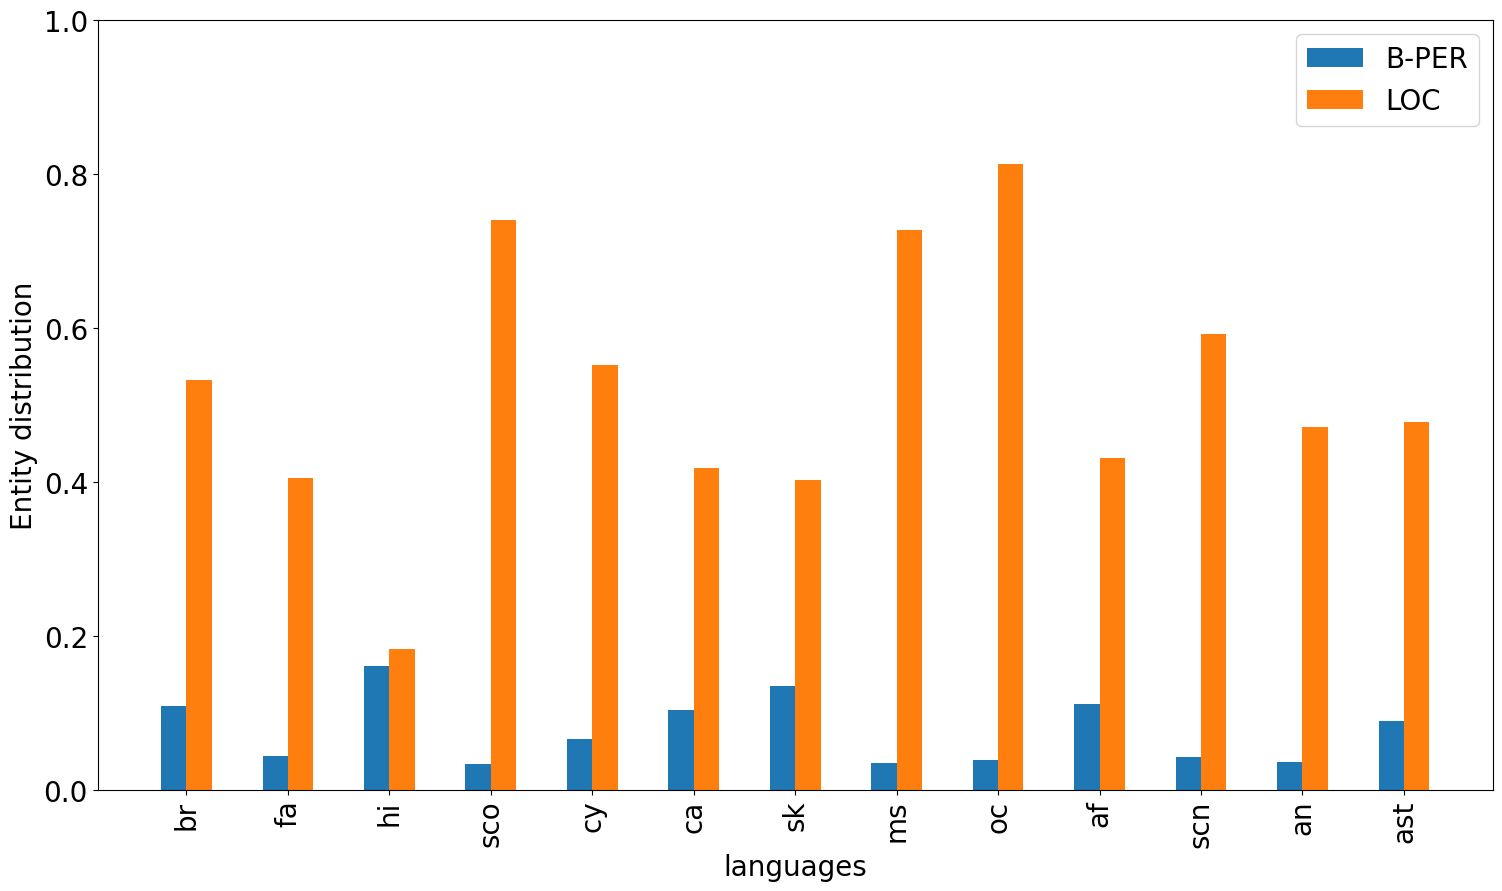

In [7]:
xs=np.array(range(len(langs)))*2
f, ax = plt.subplots(figsize=(18,10))
# plt.bar(xs-1,ner_results['f1_score'],width = .5)
# plt.bar(xs-.5,ner_results['f1_score after B-PER perturb'],width = .5)
# plt.bar(xs,ner_results['main f1-score P-BER'],width = .5)
# plt.bar(xs+.5,ner_results['perturbution f1-score P-BER'],width = .5)
plt.bar(xs-.25,ner_results['B-PER distribution'],width = .5)
plt.bar(xs+.25,ner_results['B-LOC distribution']+ner_results['I-LOC distribution'],width = .5)
plt.xticks(xs,langs)
plt.xticks(rotation=90,fontsize=20)
plt.setp(plt.gcf().get_axes(),ylim=(0,1))
plt.yticks(fontsize=20)
# plt.autoscale(tight=True)
plt.legend(['B-PER','LOC'],fontsize=20)
plt.xlabel('languages',fontsize=20)
plt.ylabel('Entity distribution',fontsize=20)
plt.savefig("per-loc-dist",bbox_inches='tight')

In [59]:
ner_results

,Unnamed: 0,l1,l2,l1-name,l2-name,model_type,Unnamed: 6,f1_score,f1_score after B-PER perturb,main f1-score P-BER,perturbution f1-score P-BER,B-PER distribution,given number count,Unnamed: 13,f1_score after LOC perturb,main f1-score LOC,perturbution f1-score LOC,B-LOC distribution,I-LOC distribution
0,0,fr,br,french,breton,bert,NaN,0.742688,0.718372,0.78,0.71,0.110142,144,NaN,0.734921,0.83,0.81,0.334255,0.198916
1,1,fr,br,french,breton,xlmroberta,NaN,0.662877,0.642458,0.65,0.57,0.110142,144,NaN,0.665887,0.76,0.75,0.334255,0.198916
2,2,br,br,breton,breton,bert,NaN,0.927661,0.884417,0.93,0.80,0.110142,144,NaN,0.882160,0.95,0.89,0.334255,0.198916
3,3,br,br,breton,breton,xlmroberta,NaN,0.890966,0.858274,0.90,0.81,0.110142,144,NaN,0.870544,0.92,0.89,0.334255,0.198916
4,4,ar,fa,arabic,persian,bert,NaN,0.450248,0.430177,0.68,0.56,0.044591,445,NaN,0.446714,0.31,0.33,0.119124,0.286537
5,5,ar,fa,arabic,persian,xlmroberta,NaN,0.435894,0.428451,0.63,0.57,0.044591,445,NaN,0.401221,0.29,0.35,0.119124,0.286537
6,6,fa,fa,persian,persian,bert,NaN,0.903051,0.880401,0.87,0.79,0.044591,445,NaN,0.891031,0.92,0.91,0.119124,0.286537
7,7,fa,fa,persian,persian,xlmroberta,NaN,0.894252,0.882201,0.86,0.81,0.044591,445,NaN,0.873954,0.92,0.90,0.119124,0.286537
8,8,ar,hi,arabic,hindi,bert,NaN,0.671948,0.642371,0.82,0.77,0.161035,199,NaN,0.688718,0.61,0.66,0.094084,0.089310
9,9,ar,hi,arabic,hindi,xlmroberta,NaN,0.672927,0.673704,0.83,0.82,0.161035,199,NaN,0.706552,0.60,0.70,0.094084,0.089310
